Problem Statement:



The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict.

Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant) Length / continuous / mm / Longest shell measurement Diameter / continuous / mm / perpendicular to length Height / continuous / mm / with meat in shell Whole weight / continuous / grams / whole abalone Shucked weight / continuous / grams / weight of meat Viscera weight / continuous / grams / gut weight (after bleeding) Shell weight / continuous / grams / after being dried Rings / integer / -- / +1.5 gives the age in years.

You have to predict the rings of each abalone which will lead us to the age of that abalone.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)


In [3]:
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\My Data\Databases\dataset1-master\abalone.csv")
# Importing Dataset

In [4]:
df.head()
# Checking dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.sample(10) # Radomly checking values in oreder if we have blank spaces in target or features.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
44,I,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.0150,4
665,F,0.395,0.295,0.095,0.2245,0.0780,0.0540,0.0800,10
1325,F,0.565,0.450,0.145,0.8495,0.4215,0.1685,0.2250,8
2383,F,0.525,0.390,0.135,0.6005,0.2265,0.1310,0.2100,16
3711,M,0.705,0.550,0.210,1.4385,0.6550,0.3255,0.4620,11
2103,M,0.375,0.290,0.100,0.2760,0.1175,0.0565,0.0850,9
4067,I,0.400,0.300,0.115,0.3180,0.1335,0.0725,0.0935,6
2090,M,0.775,0.570,0.220,2.0320,0.7350,0.4755,0.6585,17
3828,M,0.680,0.520,0.175,1.5430,0.7525,0.3510,0.3740,11
2884,I,0.505,0.425,0.125,0.6115,0.2450,0.1375,0.2000,9


In [6]:
df.describe() # Data distrubution shows no missing values

# Also we can see whole weight , Shucked weight and Rings values have a comparativly larger max value it may have outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.isnull().sum() 
# We have no null values in our dataset

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

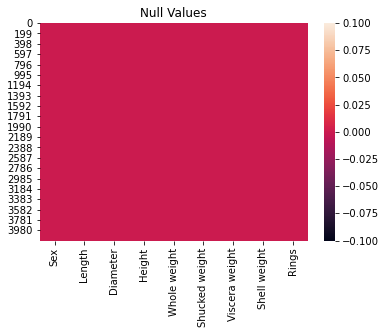

In [8]:
# Confirming with heatmap there are no null values
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()


In [9]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Our sex column is in object datatype we need to convert it into interger with LabelIncoder

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex']= le.fit_transform(df['Sex'])

In [11]:
df['Sex'].sample(5)

681     2
3609    0
3095    2
3155    2
1572    1
Name: Sex, dtype: int32

In [12]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [13]:
le.inverse_transform([0,1,2])

array(['F', 'I', 'M'], dtype=object)

Our Label Encoder has set 0 for the Female , 1 for the Infant and 2 for the Male

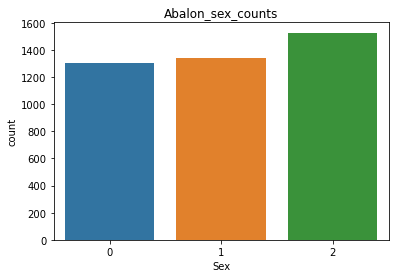

In [14]:
sns.countplot(x='Sex', data=df)
plt.title('Abalon_sex_counts')
plt.show()

We can see there is sex column is somehow balanced.

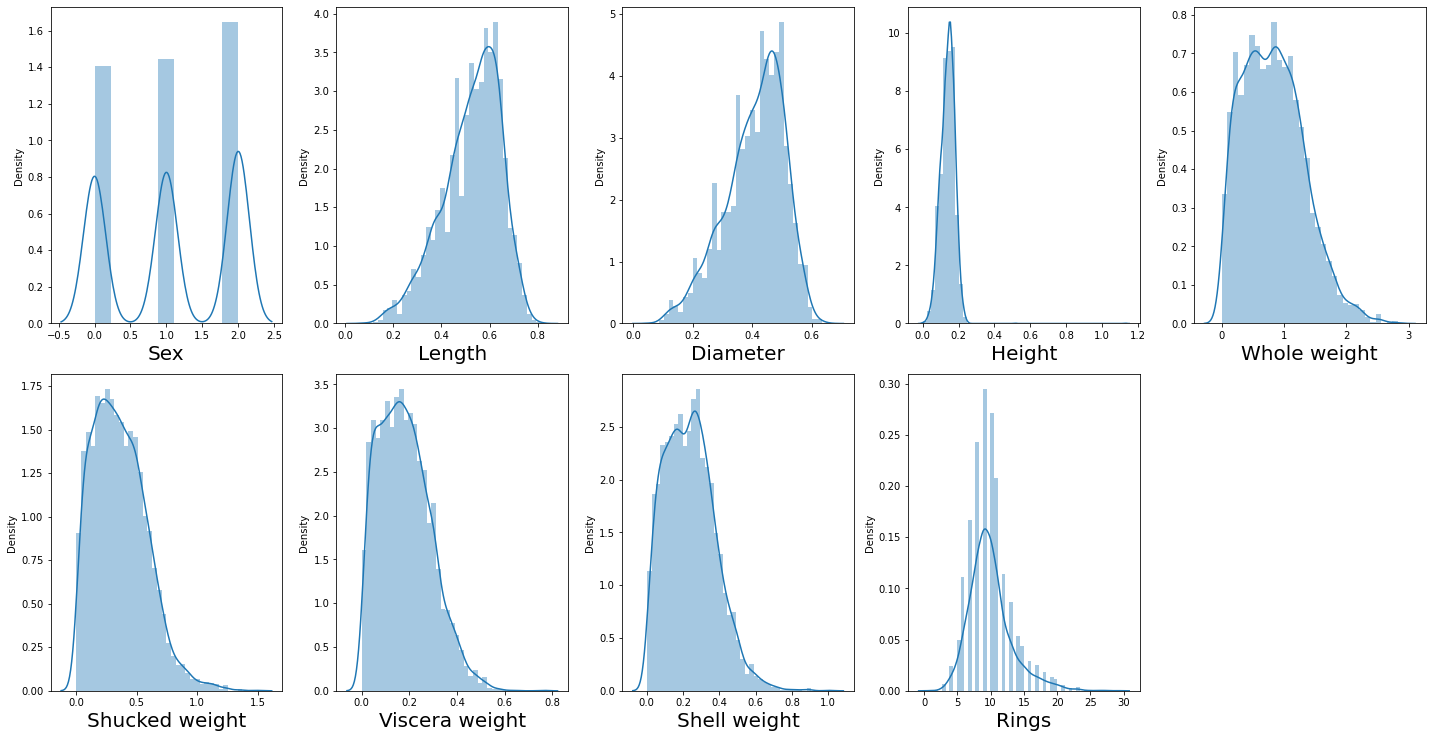

In [15]:
# Checking the data distribution 

plt.figure(figsize=(20,20), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

We can see in the distribution plots that our data has some skewness but otherwise looks to be normally distributed

In [16]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64


We found that columns Height and Rings have more skewness and it needs to be removed

In [17]:
# Checking of correlation
corr_mat = df.corr().abs()

corr_mat


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,0.036066,0.038874,0.042077,0.021391,0.001373,0.032067,0.034854,0.034627
Length,0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


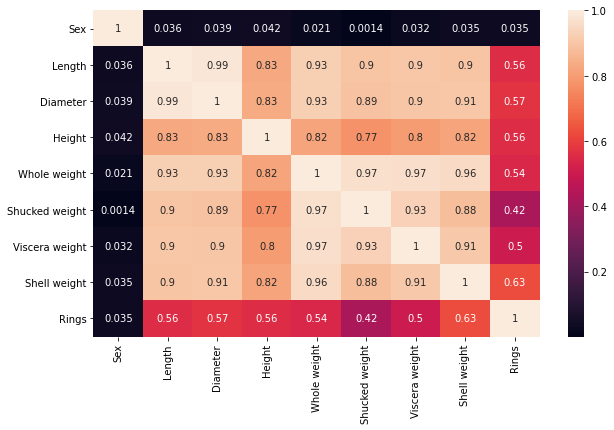

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True)
plt.show()

We found that no feature has strong correlation with target column We can see strong correlation between Shell weight and ,Whole weight , Visera Weight but dont want to lose data so not dropping any columns.

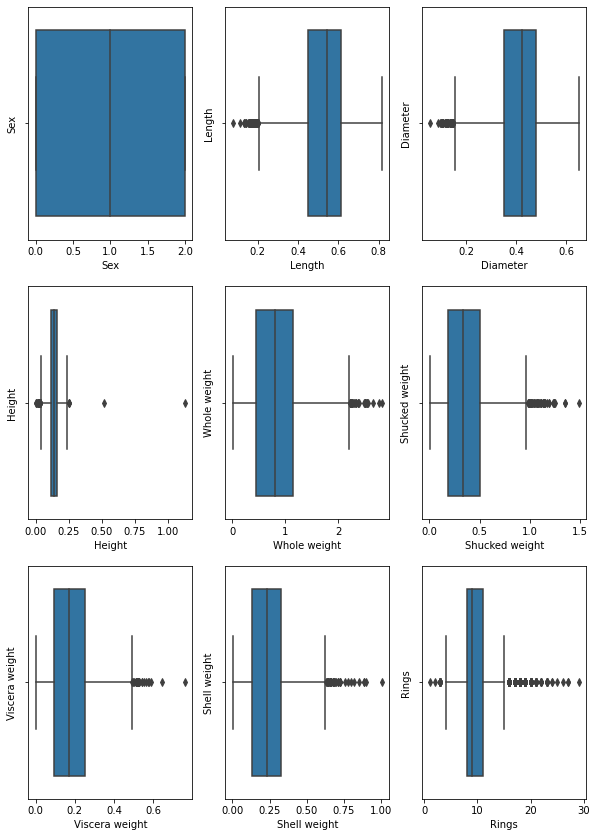

In [19]:
plt.figure(figsize = (10,30))
graph = 1

for column in df:
    if graph <=9:
        ax = plt.subplot(6,3,graph)
        sns.boxplot(df[column], orient ='h')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graph+=1   
plt.show()

In [20]:
# Remiving outliers with zscore
from scipy.stats import zscore

z_score = zscore(df[['Length','Diameter','Height','Shell weight','Whole weight','Viscera weight','Shucked weight']])

abs_z_score = np.abs(z_score)


filtering_entry = (abs_z_score < 3).all(axis=1)

df=df[filtering_entry]

In [21]:
df.shape

(4084, 9)

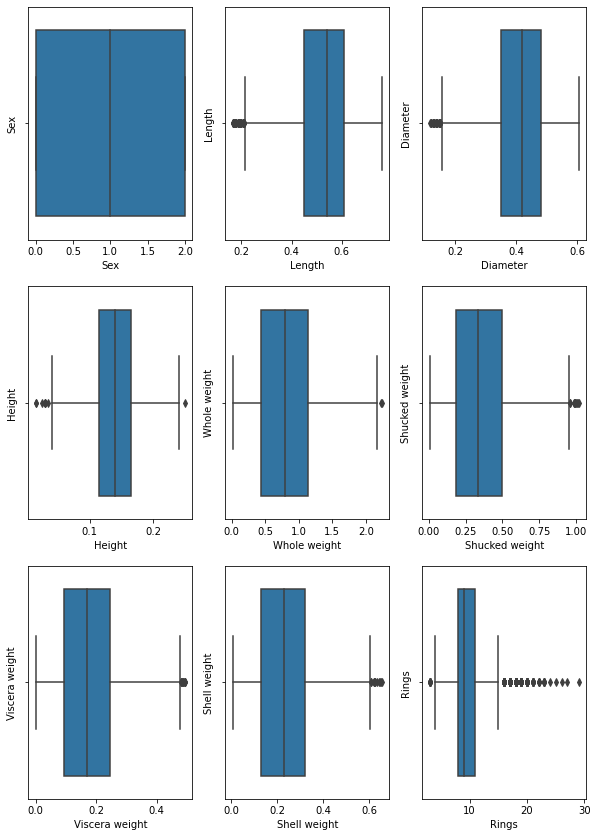

In [22]:
plt.figure(figsize = (10,30))
graph = 1

for column in df:
    if graph <=9:
        ax = plt.subplot(6,3,graph)
        sns.boxplot(df[column], orient ='h')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graph+=1   
plt.show()

Now we see many of outliers are removed

In [23]:
# Checking data lost due to removel of outliers
data_lost = 100- ((4082*100)/4177)
print("Data Lost=", data_lost,'%')

Data Lost= 2.274359588221216 %


In [24]:
# Dividing Dataset into features and Labels

x = df.drop('Rings', axis=1)
y =df['Rings']

In [25]:
x.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

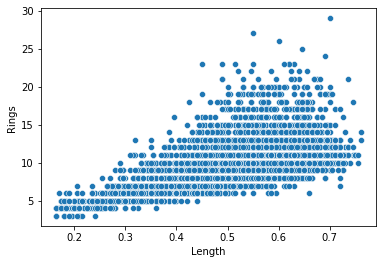

In [26]:
sns.scatterplot(x['Length'],y)
plt.show()

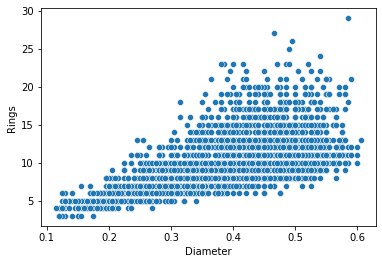

In [27]:
sns.scatterplot(x['Diameter'],y)
plt.show()

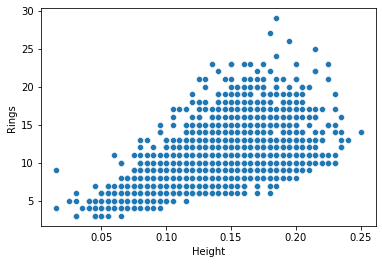

In [28]:
sns.scatterplot(x['Height'],y)
plt.show()

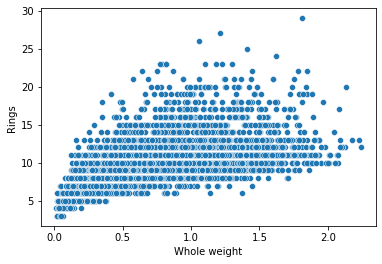

In [29]:
sns.scatterplot(x['Whole weight'],y)
plt.show()    

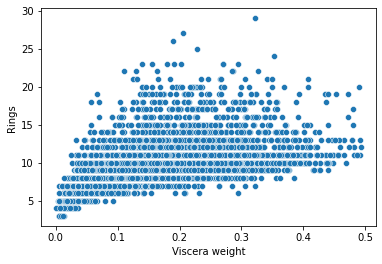

In [30]:
sns.scatterplot(x['Viscera weight'],y)
plt.show()

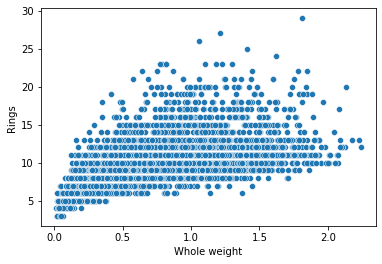

In [31]:
sns.scatterplot(x['Whole weight'],y)
plt.show()

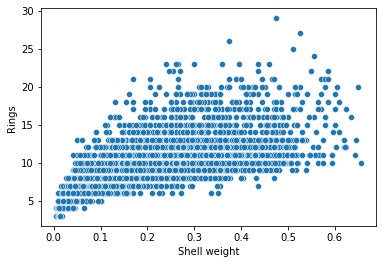

In [32]:
sns.scatterplot(x['Shell weight'],y)
plt.show()

We found that all of features have positive relation with target variable

In [33]:
# Removing skewness from the dara

from sklearn.preprocessing import power_transform

x_new = power_transform(x)

In [34]:
x = pd.DataFrame(x_new,columns=x.columns)

In [35]:
x.skew()

Sex              -0.174014
Length           -0.084034
Diameter         -0.080768
Height           -0.016167
Whole weight     -0.018290
Shucked weight    0.020227
Viscera weight    0.034242
Shell weight      0.017040
dtype: float64

We can see skewness is removed


In [36]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.131818,-0.696161,-0.554594,-1.168296,-0.588451,-0.550030,-0.698406,-0.598766
1,1.131818,-1.420433,-1.409424,-1.289091,-1.362331,-1.319429,-1.341090,-1.340159
2,-1.308220,-0.058200,0.025024,-0.142854,-0.199039,-0.371744,-0.251272,-0.096466
3,1.131818,-0.811094,-0.554594,-0.409259,-0.583488,-0.601436,-0.550573,-0.555262
4,-0.005100,-1.538442,-1.482282,-1.525912,-1.422319,-1.386634,-1.459221,-1.489465


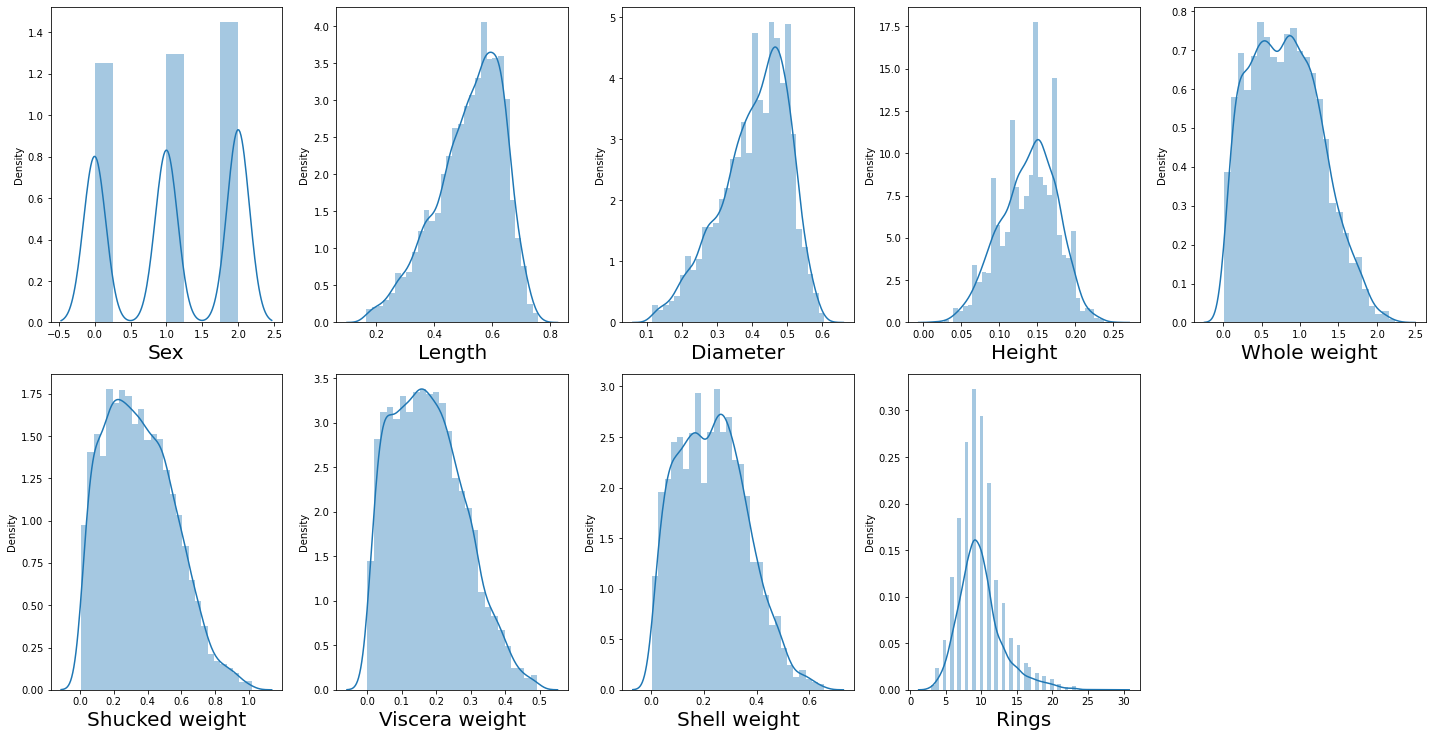

In [37]:
plt.figure(figsize=(20,20), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

Checking with distplots if skewness still exist

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled=x

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,_y_test= train_test_split(x,y,test_size=.20,random_state=41)

Model instantiating and training

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
LR = LinearRegression()

In [42]:
LR.fit(x_train,y_train)

LinearRegression()

In [44]:
LR.score(x_train, y_train)

0.5331193359100395

In [46]:
LR.score(x_test,_y_test)

0.4936045632829409

In [68]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [70]:
y_pred = LR.predict(x_test)

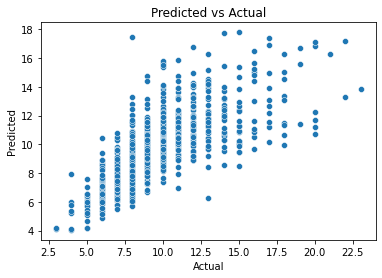

In [143]:
sns.scatterplot(_y_test,y_pred)
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [72]:
mean_absolute_error(_y_test,y_pred)

1.592311073881318

In [74]:
m = mean_squared_error(_y_test,y_pred)

In [75]:
np.sqrt(m)

2.1569903376470507

In [76]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV , LassoCV

In [77]:
lasscv = LassoCV(alphas = None, max_iter = 1500, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=1500, normalize=True)

In [78]:
alpha = lasscv.alpha_

alpha

3.551981430181549e-05

In [79]:
lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.551981430181549e-05)

In [81]:
lasso_reg.score(x_test,_y_test)

0.49361807507563105

In [82]:
ridgecv = RidgeCV(alphas = np.arange(0.0001,0.001,0.01), normalize = True)

ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.0001]), normalize=True)

In [83]:
ridgecv.alpha_
0.0001

0.0001

In [84]:
ridge_model = Ridge(alpha =ridgecv.alpha_)
                    
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [86]:
ridge_model.score(x_test,_y_test)

0.4936045752691848

We are getting same R2 score using LASSO and Ridge hence our Regression model is not Overfitting

In [87]:
# Checkig with Randnsom forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
clf = RandomForestRegressor(n_estimators=5)

In [104]:
clf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5)

In [105]:
y_pred = clf.predict(x_test)

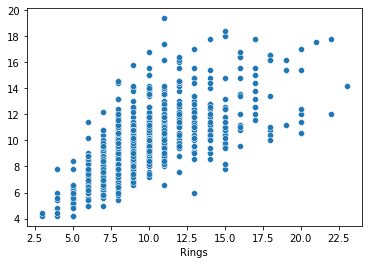

In [111]:
sns.scatterplot(_y_test, y_pred) # Checking predicted vs Actual
plt.show()

In [112]:
clf = RandomForestRegressor(n_estimators=157, ) # Optimzing parameters

In [113]:
features = x.shape[1]

In [117]:
from sklearn.model_selection import GridSearchCV

In [128]:
params = {'n_estimators':[9,13,15,20,25,],
         'max_depth':[8,10,15,20],
         'min_samples_split':[10,12,8,14],
         'min_samples_leaf':[5,6,7,9]
         }

In [129]:
grd = GridSearchCV(clf,param_grid=params)

In [130]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=157),
             param_grid={'max_depth': [8, 10, 15, 20],
                         'min_samples_leaf': [5, 6, 7, 9],
                         'min_samples_split': [10, 12, 8, 14],
                         'n_estimators': [9, 13, 15, 20, 25]})

In [131]:
print('Best Params', grd.best_params_)

Best Params {'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 14, 'n_estimators': 25}


In [133]:
clf = RandomForestRegressor(n_estimators=25,max_depth = 15, min_samples_leaf=7,min_samples_split=14, )
# Fitting model with best parameters

In [134]:
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

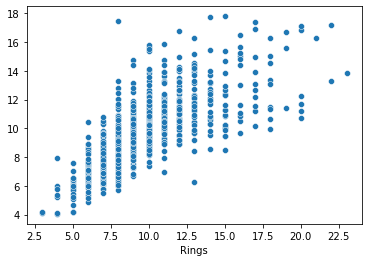

In [136]:
sns.scatterplot(_y_test, y_pred) # Checking predicted vs Actual
plt.show()


In [139]:
b = mean_absolute_error(_y_test,y_pred)

print ('mean_absolute_error for Random Forest-',b )

mean_absolute_error for Random Forest- 1.5409035058936376


In [140]:
m = mean_squared_error(_y_test,y_pred)

k =np.sqrt(m)

print('mean_squared_error for Random Forest-',k)

mean_squared_error for Random Forest- 2.1504124444377757


In [144]:
import pickle
pickle.dump(LR, open('Abalone_case_study', 'wb'))